# Data Exploration

## Introduction

Dans le secteur bancaire, la rétention des clients constitue un enjeu stratégique majeur.
Le churn client, qui correspond à la perte d’un client lorsque l’ensemble de ses comptes
bancaires sont fermés, peut avoir un impact significatif sur la rentabilité et la stabilité
financière d’une banque.

Le churn ne survient généralement pas de manière soudaine. Il est souvent précédé d’une
phase de désengagement progressif, observable à travers une baisse de l’activité bancaire,
une diminution des soldes ou des changements dans le comportement des clients.

L’objectif de ce projet est de réaliser une analyse statistique descriptive et comparative
du churn client bancaire, à partir de données anonymisées. L’étude repose sur une fusion
initiale des données suivie d’une phase rigoureuse de nettoyage, afin de construire un
jeu de données fiable et exploitable pour l’analyse statistique.

Cette analyse adopte une démarche non prédictive, sans recours à des modèles de machine
learning, et vise à mettre en évidence des signaux de désengagement associés à
l’attrition client à travers des indicateurs sociodémographiques, temporels et financiers.


## Description des données

L’étude repose sur des données bancaires anonymisées organisées autour de trois tables principales :

**CUSTOMERS** : contient les informations sociodémographiques des clients, notamment l’âge et l’ancienneté.

**ACCOUNTS** : regroupe les informations relatives aux comptes bancaires des clients, incluant le statut des comptes (actif ou fermé).

**BALANCES** : fournit les informations financières associées aux comptes, en particulier les soldes et leur évolution.

Après préparation et fusion des données, le jeu final comprend 363 313 clients pour un total de 373 156 comptes, constituant une base volumineuse et représentative pour l’analyse statistique du churn client.

## Préparation de l’environnement et importation des données

Cette section présente la préparation de l’environnement de travail sous R ainsi que
l’importation des données bancaires stockées sur Google Drive. Les données sont fournies
sous forme d’un fichier Excel structuré en trois tables : CUSTOMERS, ACCOUNTS et BALANCES.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
# Nettoyage de l'environnement
rm(list = ls())

# Installation des packages si nécessaire (Colab)
required_packages <- c("tidyverse", "readxl", "lubridate")
installed <- rownames(installed.packages())

for (pkg in required_packages) {
  if (!pkg %in% installed) {
    install.packages(pkg)
  }
}

# Chargement des bibliothèques
library(tidyverse)
library(readxl)
library(lubridate)

# Montage de Google Drive
library(googledrive)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Nettoyage de l'environnement
rm(list = ls())

# Installation des packages si nécessaire (Colab)
required_packages <- c("tidyverse", "readxl", "lubridate")
installed <- rownames(installed.packages())

for (pkg in required_packages) {
  if (!pkg %in% installed) {
    install.packages(pkg)
  }
}

# Chargement des bibliothèques
library(tidyverse)
library(readxl)
library(lubridate)

# Montage de Google Drive
library(googledrive)


In [3]:
# Chemin du fichier sur Google Drive
path <- "/content/drive/MyDrive/projectR/CHURN.ANALYSIS.xlsx"

# Importation des données
customers <- read_excel(path, sheet = "CUSTOMERS")
accounts  <- read_excel(path, sheet = "ACCOUNTS")
balances  <- read_excel(path, sheet = "BALANCES")

# Vérification initiale
dim(customers)
dim(accounts)
dim(balances)


[1] 363313     14

[1] 421033      9

[1] 421033      3

## Fusion initiale des données

Une fusion brute des tables CUSTOMERS, ACCOUNTS et BALANCES est réalisée afin de
construire un jeu de données analytique initial. La fusion repose sur les clés
Customer et Account, communes aux trois tables.

Cette étape est effectuée sans nettoyage préalable afin de conserver l’intégralité
des informations et d’identifier par la suite les anomalies, incohérences et valeurs
manquantes présentes dans les données.


In [4]:
colnames(customers)
colnames(accounts)
colnames(balances)


[1] "Customer"                  "Account"                  
 [3] "NATIONALITY"               "RESIDENCE"                
 [5] "TARGET"                    "MARITAL_STATUS"           
 [7] "CUSTOMER_SINCE"            "DATE_OF_BIRTH"            
 [9] "L_NATURE_CLIENT"           "ACCOUNT_OFFICER"          
[11] "L_SCORE_KYC"               "KYC_COMPLETE"             
[13] "LAST_KYC_REVIEW_DATE"      "AUTO_NEXT_KYC_REVIEW_DATE"

[1] "Customer"        "Account"         "STATUS"          "OPENING_DATE"   
[5] "CATEGORY"        "ACCOUNT_TYPE"    "CURRENCY"        "ACCT_CLOSE_DATE"
[9] "CLOSURE_REASON"

[1] "Customer"        "Account"         "WORKING_BALANCE"

In [5]:
#Fusion CUSTOMERS + ACCOUNTS
data_fused <- customers %>%
  left_join(accounts, by = c("Customer", "Account"))

# Vérification intermédiaire
dim(data_fused)
colnames(data_fused)


[1] 365890     21

[1] "Customer"                  "Account"                  
 [3] "NATIONALITY"               "RESIDENCE"                
 [5] "TARGET"                    "MARITAL_STATUS"           
 [7] "CUSTOMER_SINCE"            "DATE_OF_BIRTH"            
 [9] "L_NATURE_CLIENT"           "ACCOUNT_OFFICER"          
[11] "L_SCORE_KYC"               "KYC_COMPLETE"             
[13] "LAST_KYC_REVIEW_DATE"      "AUTO_NEXT_KYC_REVIEW_DATE"
[15] "STATUS"                    "OPENING_DATE"             
[17] "CATEGORY"                  "ACCOUNT_TYPE"             
[19] "CURRENCY"                  "ACCT_CLOSE_DATE"          
[21] "CLOSURE_REASON"

In [6]:
#Fusion avec BALANCES
data_fused <- data_fused %>%
  left_join(balances, by = c("Customer", "Account"))

# Vérifications finales
dim(data_fused)
glimpse(data_fused)


Warning message in left_join(., balances, by = c("Customer", "Account")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 48 of `x` matches multiple rows in `y`.
ℹ Row 51 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


[1] 373156     22

Rows: 373,156
Columns: 22
$ Customer                  <dbl> 113249470, 113428259, 113220016, 113792858, …
$ Account                   <dbl> 2002389737, 2010392607, 2003019510, 20104678…
$ NATIONALITY               <chr> "TN", "TN", "TN", "TN", "TN", "TN", "TN", "T…
$ RESIDENCE                 <chr> "TN", "TN", "TN", "TN", "TN", "TN", "TN", "T…
$ TARGET                    <chr> "4", "4", "4", "4", "4", "4", "4", "4", "11"…
$ MARITAL_STATUS            <chr> "M", "C", "M", "M", NA, "C", "C", "C", "M", …
$ CUSTOMER_SINCE            <dbl> 20170202, 20111116, 20140107, 20230817, 2024…
$ DATE_OF_BIRTH             <chr> "19760127", "19810412", "19590124", "1962083…
$ L_NATURE_CLIENT           <chr> "PPH", "PPH", "PPH", "PPH", "PPH", "PPH", "P…
$ ACCOUNT_OFFICER           <dbl> 5812, 5855, 5841, 5827, 5922, 5821, 5869, 58…
$ L_SCORE_KYC               <chr> "LR", "LR", "LR", "LR", "LR", "LR", "LR", "L…
$ KYC_COMPLETE              <chr> NA, "YES", "YES", "YES", "YES", "YES", NA, N…
$ LAST_KYC_REV

## Inspection post-fusion des données

Une inspection du jeu de données fusionné est réalisée afin d’identifier les problèmes structurels avant nettoyage : types de variables incorrects, valeurs manquantes,duplications liées aux relations entre tables et présence de valeurs aberrantes.

Cette étape permet de définir précisément les règles de nettoyage à appliquer pour construire un jeu de données fiable.


In [7]:
# Dimensions et types
dim(data_fused)
sapply(data_fused, class)

# Taux de valeurs manquantes
na_summary <- data_fused %>%
  summarise(across(everything(), ~ mean(is.na(.)))) %>%
  pivot_longer(everything(),
               names_to = "variable",
               values_to = "missing_rate") %>%
  arrange(desc(missing_rate))

na_summary


[1] 373156     22

Customer                   Account               NATIONALITY 
                "numeric"                 "numeric"               "character" 
                RESIDENCE                    TARGET            MARITAL_STATUS 
              "character"               "character"               "character" 
           CUSTOMER_SINCE             DATE_OF_BIRTH           L_NATURE_CLIENT 
                "numeric"               "character"               "character" 
          ACCOUNT_OFFICER               L_SCORE_KYC              KYC_COMPLETE 
                "numeric"               "character"               "character" 
     LAST_KYC_REVIEW_DATE AUTO_NEXT_KYC_REVIEW_DATE                    STATUS 
              "character"                 "numeric"               "character" 
             OPENING_DATE                  CATEGORY              ACCOUNT_TYPE 
              "character"                 "numeric"               "character" 
                 CURRENCY           ACCT_CLOSE_DATE            CLOSURE_REASON 
              "character"               "character"               "character" 
          WORKING_BALANCE 
              "character"

variable,missing_rate
<chr>,<dbl>
CLOSURE_REASON,6.673858e-01
ACCT_CLOSE_DATE,6.671714e-01
KYC_COMPLETE,4.700286e-01
WORKING_BALANCE,2.506994e-01
OPENING_DATE,2.424268e-01
CATEGORY,2.424268e-01
ACCOUNT_TYPE,2.424268e-01
CURRENCY,2.424268e-01
DATE_OF_BIRTH,5.059814e-02


## Nettoyage des types et formats de dates

Une phase de nettoyage est appliquée afin de corriger les types de variables et de
convertir les dates et montants financiers dans des formats exploitables pour l’analyse
statistique. Cette étape est essentielle pour garantir la cohérence des calculs et des
visualisations ultérieures.


In [8]:
#NETTOYAGE DES TYPES
data_clean <- data_fused %>%
  mutate(
    # Conversion des dates (format YYYYMMDD)
    DATE_OF_BIRTH = ymd(DATE_OF_BIRTH),
    CUSTOMER_SINCE = ymd(CUSTOMER_SINCE),
    OPENING_DATE = ymd(OPENING_DATE),
    ACCT_CLOSE_DATE = ymd(ACCT_CLOSE_DATE),
    LAST_KYC_REVIEW_DATE = ymd(LAST_KYC_REVIEW_DATE),
    AUTO_NEXT_KYC_REVIEW_DATE = ymd(AUTO_NEXT_KYC_REVIEW_DATE),

    # Conversion du solde en numérique
    WORKING_BALANCE = as.numeric(WORKING_BALANCE)
  )

# Vérification des types après nettoyage
sapply(data_clean, class)


Customer                   Account               NATIONALITY 
                "numeric"                 "numeric"               "character" 
                RESIDENCE                    TARGET            MARITAL_STATUS 
              "character"               "character"               "character" 
           CUSTOMER_SINCE             DATE_OF_BIRTH           L_NATURE_CLIENT 
                   "Date"                    "Date"               "character" 
          ACCOUNT_OFFICER               L_SCORE_KYC              KYC_COMPLETE 
                "numeric"               "character"               "character" 
     LAST_KYC_REVIEW_DATE AUTO_NEXT_KYC_REVIEW_DATE                    STATUS 
                   "Date"                    "Date"               "character" 
             OPENING_DATE                  CATEGORY              ACCOUNT_TYPE 
                   "Date"                 "numeric"               "character" 
                 CURRENCY           ACCT_CLOSE_DATE            CLOSURE_REASON 
              "character"                    "Date"               "character" 
          WORKING_BALANCE 
                "numeric"

## Nettoyage des valeurs manquantes

Les valeurs manquantes sont traitées en tenant compte de la logique métier bancaire.
Certaines valeurs manquantes sont informatives (par exemple, l’absence de date de clôture
indique un compte actif), tandis que d’autres correspondent à des informations non
renseignées.

Les règles de traitement sont définies de manière à préserver le sens métier des données
et à éviter toute imputation arbitraire.


In [10]:
#NETTOYAGE DES NA

data_clean <- data_clean %>%
  mutate(
    # KYC
    KYC_COMPLETE = if_else(is.na(KYC_COMPLETE), "UNKNOWN", KYC_COMPLETE),

    # Variables catégorielles de compte
    ACCOUNT_TYPE = if_else(is.na(ACCOUNT_TYPE), "UNKNOWN", ACCOUNT_TYPE),
    CURRENCY     = if_else(is.na(CURRENCY), "UNKNOWN", CURRENCY),

    # CATEGORY est numérique
    CATEGORY = if_else(is.na(CATEGORY), 0, CATEGORY)
  )


## Création des variables temporelles

Des variables temporelles sont créées afin de caractériser le profil des clients.
L’âge du client est calculé à partir de la date de naissance, et l’ancienneté bancaire
correspond à la durée de la relation entre le client et la banque.


In [11]:
#— Âge & ancienneté
data_clean <- data_clean %>%
  mutate(
    age = as.integer(interval(DATE_OF_BIRTH, Sys.Date()) / years(1)),
    seniority_years = as.integer(interval(CUSTOMER_SINCE, Sys.Date()) / years(1))
  )

# Vérification rapide
summary(select(data_clean, age, seniority_years))


      age         seniority_years
 Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 34.00   1st Qu.: 5.00  
 Median : 45.00   Median :10.00  
 Mean   : 47.13   Mean   :10.56  
 3rd Qu.: 59.00   3rd Qu.:16.00  
 Max.   :835.00   Max.   :29.00  
 NA's   :18881    NA's   :4      

## Correction des valeurs aberrantes de l’âge

L’analyse de la variable âge a mis en évidence la présence de valeurs aberrantes,
notamment des âges irréalistes résultant de dates de naissance invalides.
Afin de garantir la cohérence de l’analyse, les âges inférieurs à 18 ans ou supérieurs
à 100 ans sont considérés comme non valides et sont remplacés par des valeurs manquantes.


In [12]:
#NETTOYAGE DE L’ÂGE

data_clean <- data_clean %>%
  mutate(
    age = if_else(age < 18 | age > 100, NA_integer_, age)
  )

# Vérification après correction
summary(data_clean$age)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   35.00   46.00   47.94   59.00  100.00   28341 

## Définition du statut des comptes

Le statut des comptes est défini à partir de la date de clôture. Un compte est considéré
comme actif lorsque la date de clôture est absente, et comme fermé lorsque cette date
est renseignée. Cette variable est essentielle pour l’identification du churn client.


In [13]:
#STATUT DES COMPTES

data_clean <- data_clean %>%
  mutate(
    account_status = if_else(
      is.na(ACCT_CLOSE_DATE),
      "Active",
      "Closed"
    )
  )

# Vérification
table(data_clean$account_status)



Active Closed 
248959 124197 

## Calcul du nombre de comptes par client

Des indicateurs sont construits afin de caractériser la structure de détention des
comptes au niveau client. Le nombre total de comptes ainsi que le nombre de comptes
actifs et fermés sont calculés pour chaque client.


In [14]:
#NOMBRE DE COMPTES
accounts_summary <- data_clean %>%
  group_by(Customer) %>%
  summarise(
    total_accounts  = n_distinct(Account),
    active_accounts = sum(account_status == "Active"),
    closed_accounts = sum(account_status == "Closed"),
    .groups = "drop"
  )

# Vérification
summary(accounts_summary)


    Customer         total_accounts active_accounts  closed_accounts   
 Min.   :113072080   Min.   :1      Min.   :0.0000   Min.   :  0.0000  
 1st Qu.:113222398   1st Qu.:1      1st Qu.:0.0000   1st Qu.:  0.0000  
 Median :113396575   Median :1      Median :1.0000   Median :  0.0000  
 Mean   :113432736   Mean   :1      Mean   :0.6852   Mean   :  0.3418  
 3rd Qu.:113652361   3rd Qu.:1      3rd Qu.:1.0000   3rd Qu.:  1.0000  
 Max.   :113870936   Max.   :1      Max.   :1.0000   Max.   :289.0000  

## Construction du jeu de données client final

Les indicateurs de structure des comptes ainsi que les indicateurs financiers
(solde moyen, minimum et maximum) sont directement agrégés au niveau client
lors de la construction du jeu de données final, afin de garantir une seule
méthode de calcul pour l’analyse statistique.

Ce jeu de données est utilisé pour la définition du churn client et l’analyse
statistique descriptive et comparative.


In [15]:
nrow(data_clean)
length(unique(data_clean$Customer))


[1] 373156

[1] 363313

In [16]:
#DATASET CLIENT FINAL (

library(dplyr)

client_data <- data_clean %>%
  select(Customer, Account, STATUS, WORKING_BALANCE, age, seniority_years) %>%
  group_by(Customer) %>%
  summarise(
    age = first(age),
    seniority_years = first(seniority_years),
    total_accounts = length(unique(Account)),
    active_accounts = sum(STATUS == "Active"),
    closed_accounts = sum(STATUS == "Closed"),
    balance_mean = mean(WORKING_BALANCE, na.rm = TRUE),
    balance_min  = suppressWarnings(min(WORKING_BALANCE, na.rm = TRUE)),
    balance_max  = suppressWarnings(max(WORKING_BALANCE, na.rm = TRUE)),
    .groups = "drop"
  )


In [17]:
dim(client_data)
summary(client_data)


[1] 363313      9

    Customer              age         seniority_years total_accounts
 Min.   :113072080   Min.   : 18.00   Min.   : 0.00   Min.   :1     
 1st Qu.:113222398   1st Qu.: 35.00   1st Qu.: 5.00   1st Qu.:1     
 Median :113396575   Median : 46.00   Median : 9.00   Median :1     
 Mean   :113432736   Mean   : 47.76   Mean   :10.45   Mean   :1     
 3rd Qu.:113652361   3rd Qu.: 59.00   3rd Qu.:16.00   3rd Qu.:1     
 Max.   :113870936   Max.   :100.00   Max.   :29.00   Max.   :1     
                     NA's   :27282    NA's   :4                     
 active_accounts  closed_accounts     balance_mean        balance_min        
 Min.   :0.0000   Min.   :  0.0000   Min.   :-22646986   Min.   :-2.265e+07  
 1st Qu.:0.0000   1st Qu.:  0.0000   1st Qu.:        3   1st Qu.: 8.500e+00  
 Median :1.0000   Median :  0.0000   Median :      142   Median : 1.149e+03  
 Mean   :0.6852   Mean   :  0.3418   Mean   :     8260   Mean   :       Inf  
 3rd Qu.:1.0000   3rd Qu.:  1.0000   3rd Qu.:     2769   3

certaines agrégations (minimum et maximum) peuvent produire des valeurs infinies lorsque le client ne dispose d’aucun solde exploitable après suppression des valeurs manquantes. Ces valeurs sont remplacées par NA afin de préserver la cohérence statistique du jeu de données.

In [18]:
client_data <- client_data %>%
  mutate(
    balance_min = ifelse(is.infinite(balance_min), NA, balance_min),
    balance_max = ifelse(is.infinite(balance_max), NA, balance_max)
  )


In [19]:
summary(client_data$balance_min)
summary(client_data$balance_max)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
-22646986         3       142      8260      2769 101483787     92836 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
-22646986         3       142      8260      2769 101483787     92836 

## Définition du churn client

Le churn client est défini comme la perte d’un client lorsque l’ensemble de ses comptes
bancaires sont fermés. Une variable binaire est créée afin d’identifier les clients
churnés et non churnés.


In [20]:
#CHURN

client_data <- client_data %>%
  mutate(
    churn = if_else(active_accounts == 0, 1, 0)
  )

# Vérification
table(client_data$churn)
prop.table(table(client_data$churn))



     0      1 
248959 114354 


        0         1 
0.6852466 0.3147534 

###Avant de procéder à l’analyse statistique descriptive, une vérification finale de la cohérence du jeu de données client est réalisée. Cette étape vise à confirmer la validité des variables clés, la gestion correcte des valeurs manquantes et la conformité des indicateurs construits avec les règles métier définies.

In [21]:
# Vérification finale du dataset client

dim(client_data)

sapply(client_data, function(x) sum(is.na(x)))

summary(
  client_data %>%
    select(
      age,
      seniority_years,
      total_accounts,
      active_accounts,
      closed_accounts,
      balance_mean,
      balance_min,
      balance_max,
      churn
    )
)


[1] 363313     10

Customer             age seniority_years  total_accounts active_accounts 
              0           27282               4               0               0 
closed_accounts    balance_mean     balance_min     balance_max           churn 
              0           92836           92836           92836               0

      age         seniority_years total_accounts active_accounts 
 Min.   : 18.00   Min.   : 0.00   Min.   :1      Min.   :0.0000  
 1st Qu.: 35.00   1st Qu.: 5.00   1st Qu.:1      1st Qu.:0.0000  
 Median : 46.00   Median : 9.00   Median :1      Median :1.0000  
 Mean   : 47.76   Mean   :10.45   Mean   :1      Mean   :0.6852  
 3rd Qu.: 59.00   3rd Qu.:16.00   3rd Qu.:1      3rd Qu.:1.0000  
 Max.   :100.00   Max.   :29.00   Max.   :1      Max.   :1.0000  
 NA's   :27282    NA's   :4                                      
 closed_accounts     balance_mean        balance_min         balance_max       
 Min.   :  0.0000   Min.   :-22646986   Min.   :-22646986   Min.   :-22646986  
 1st Qu.:  0.0000   1st Qu.:        3   1st Qu.:        3   1st Qu.:        3  
 Median :  0.0000   Median :      142   Median :      142   Median :      142  
 Mean   :  0.3418   Mean   :     8260   Mean   :     8260   Mean   :     8260  
 3rd Qu.:  1.0000   3rd Qu.:     2769   3rd Qu.:     2769   3rd Qu.:    

## Export du jeu de données nettoyé


In [36]:
write.csv(data_clean, "data_clean.csv", row.names = FALSE)


##Analyse statistique descriptive globale

Cette section présente une analyse statistique descriptive des principales variables quantitatives du jeu de données client. L’objectif est de comprendre la distribution globale des caractéristiques démographiques, financières et structurelles avant toute comparaison entre clients churnés et non churnés.

In [22]:
# Statistiques descriptives globales des variables numériques

client_data %>%
  select(
    age,
    seniority_years,
    total_accounts,
    active_accounts,
    closed_accounts,
    balance_mean
  ) %>%
  summary()


      age         seniority_years total_accounts active_accounts 
 Min.   : 18.00   Min.   : 0.00   Min.   :1      Min.   :0.0000  
 1st Qu.: 35.00   1st Qu.: 5.00   1st Qu.:1      1st Qu.:0.0000  
 Median : 46.00   Median : 9.00   Median :1      Median :1.0000  
 Mean   : 47.76   Mean   :10.45   Mean   :1      Mean   :0.6852  
 3rd Qu.: 59.00   3rd Qu.:16.00   3rd Qu.:1      3rd Qu.:1.0000  
 Max.   :100.00   Max.   :29.00   Max.   :1      Max.   :1.0000  
 NA's   :27282    NA's   :4                                      
 closed_accounts     balance_mean      
 Min.   :  0.0000   Min.   :-22646986  
 1st Qu.:  0.0000   1st Qu.:        3  
 Median :  0.0000   Median :      142  
 Mean   :  0.3418   Mean   :     8260  
 3rd Qu.:  1.0000   3rd Qu.:     2769  
 Max.   :289.0000   Max.   :101483787  
                    NA's   :92836      

##Visualisation des distributions (Histogrammes)

Afin de mieux comprendre la distribution des principales variables quantitatives, des histogrammes sont construits. Les valeurs manquantes sont ignorées uniquement pour la visualisation afin de ne pas biaiser l’analyse graphique.

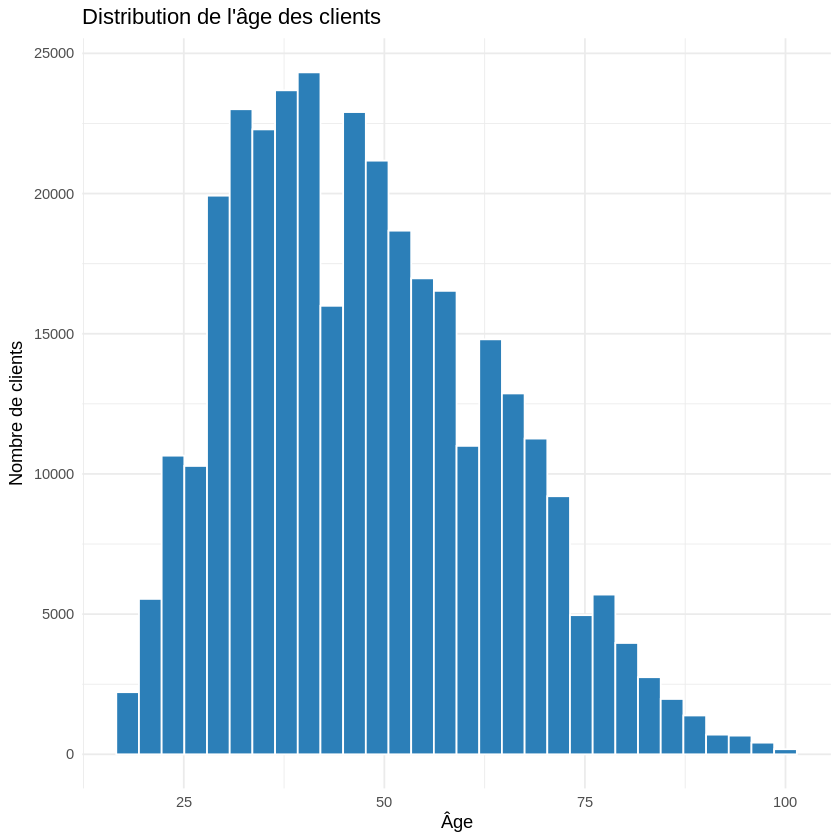

In [23]:
#Histogramme de l’âge

library(ggplot2)

ggplot(client_data, aes(x = age)) +
  geom_histogram(
    bins = 30,
    fill = "#2C7FB8",
    color = "white",
    na.rm = TRUE
  ) +
  labs(
    title = "Distribution de l'âge des clients",
    x = "Âge",
    y = "Nombre de clients"
  ) +
  theme_minimal()


##Distribution de l’ancienneté client


L’ancienneté des clients constitue un indicateur clé de la relation bancaire. Un histogramme est utilisé afin d’analyser la répartition des clients selon leur durée de relation avec la banque.

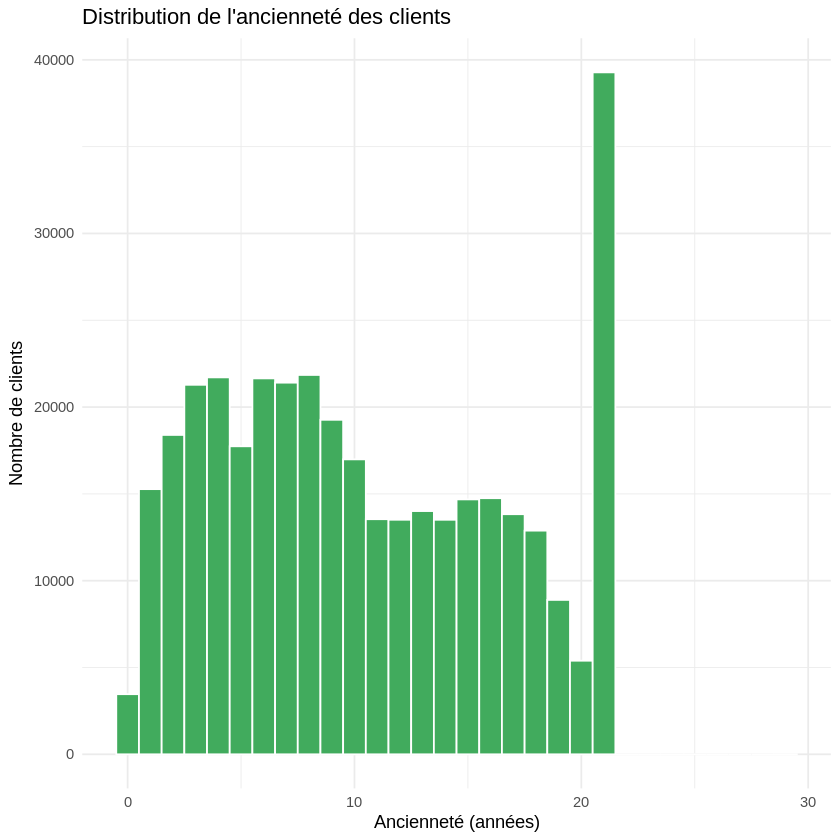

In [24]:
#Histogramme de l’ancienneté

ggplot(client_data, aes(x = seniority_years)) +
  geom_histogram(
    binwidth = 1,
    fill = "#41AB5D",
    color = "white",
    na.rm = TRUE
  ) +
  labs(
    title = "Distribution de l'ancienneté des clients",
    x = "Ancienneté (années)",
    y = "Nombre de clients"
  ) +
  theme_minimal()



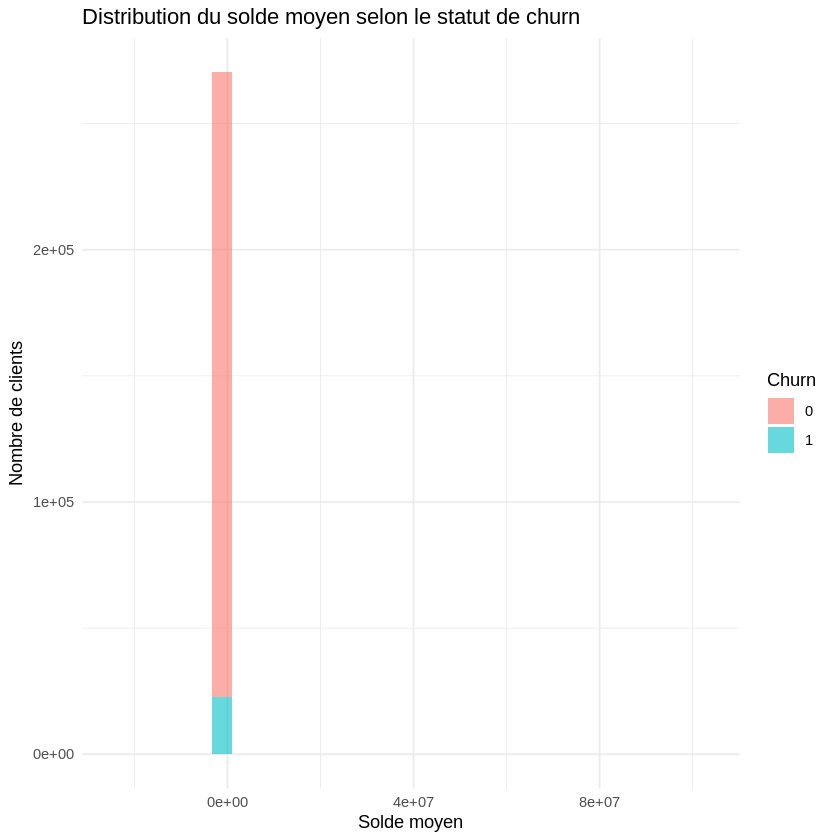

In [25]:
# histogram du solde moyen selon le statut de churn

library(ggplot2)

ggplot(client_data, aes(x = balance_mean, fill = factor(churn))) +
  geom_histogram(bins = 30, alpha = 0.6, na.rm = TRUE) +
  labs(
    title = "Distribution du solde moyen selon le statut de churn",
    x = "Solde moyen",
    y = "Nombre de clients",
    fill = "Churn"
  ) +
  theme_minimal()


###Analyse du solde moyen des clients

Le solde moyen des comptes constitue un indicateur financier central.
Son analyse permet d’identifier les profils financiers des clients et de détecter d’éventuels signaux de désengagement progressif.

La présence de soldes moyens négatifs est cohérente avec des situations de découvert bancaire et ne constitue pas une anomalie de données.



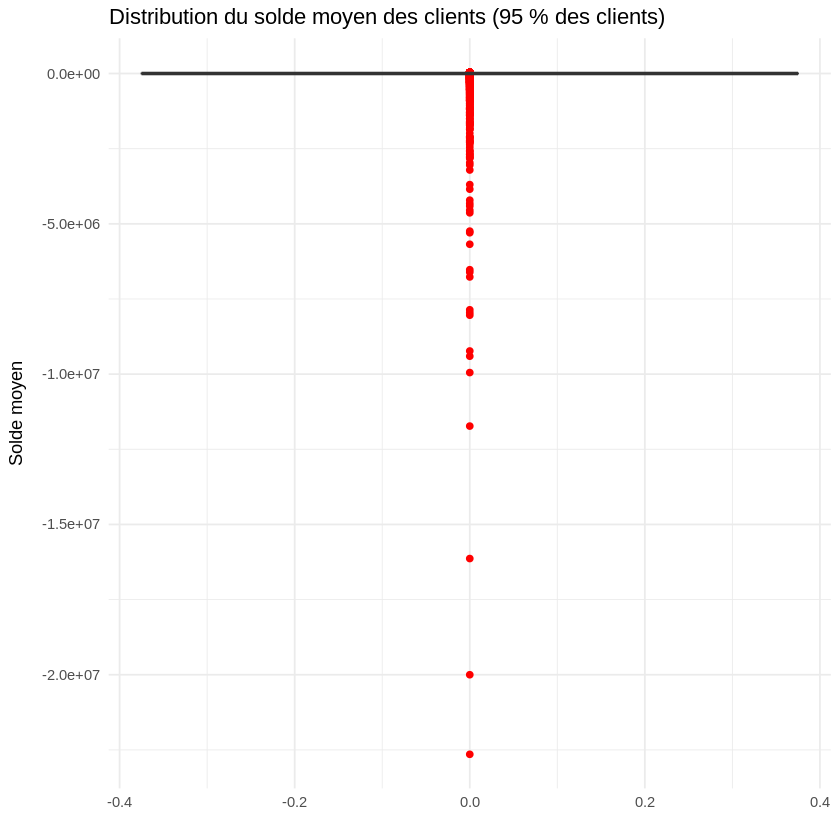

In [26]:
#Boxplot du solde moyen

library(dplyr)
library(ggplot2)

# Calcul du 95e percentile
q95 <- quantile(client_data$balance_mean, 0.95, na.rm = TRUE)

client_data %>%
  filter(!is.na(balance_mean), balance_mean <= q95) %>%
  ggplot(aes(y = balance_mean)) +
  geom_boxplot(fill = "steelblue", outlier.colour = "red") +
  labs(
    title = "Distribution du solde moyen des clients (95 % des clients)",
    y = "Solde moyen",
    x = ""
  ) +
  theme_minimal()







La limitation au 95ᵉ percentile est appliquée uniquement pour améliorer la lisibilité de la visualisation et ne correspond pas à une suppression de données. Les analyses statistiques sont réalisées sur l’ensemble des observations disponibles.

## Analyse statistique comparative

Cette sous-section vise à comparer les caractéristiques des clients churnés et non churnés à l’aide de statistiques descriptives.
L’objectif est d’identifier d’éventuelles différences de profils entre les deux groupes avant toute analyse plus avancée.

In [27]:
#statistiques descriptives par churn

# ANALYSE DESCRIPTIVE PAR STATUT DE CHURN

client_data %>%
  group_by(churn) %>%
  summarise(
    age_mean = mean(age, na.rm = TRUE),
    age_median = median(age, na.rm = TRUE),

    seniority_mean = mean(seniority_years, na.rm = TRUE),
    seniority_median = median(seniority_years, na.rm = TRUE),

    active_accounts_mean = mean(active_accounts),
    closed_accounts_mean = mean(closed_accounts),

    balance_mean_avg = mean(balance_mean, na.rm = TRUE),
    balance_mean_median = median(balance_mean, na.rm = TRUE),

    n_clients = n(),
    .groups = "drop"
  )


churn,age_mean,age_median,seniority_mean,seniority_median,active_accounts_mean,closed_accounts_mean,balance_mean_avg,balance_mean_median,n_clients
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,48.37811,47,10.42490,10,1,0.000000,8134.544,148.9645,248959
1,46.45840,44,10.50474,9,0,1.086075,9615.244,75.0740,114354


Afin de compléter la comparaison descriptive, une visualisation graphique est utilisée pour comparer la distribution de l’âge entre les clients churnés et non churnés.
Cette approche permet d’identifier visuellement d’éventuelles différences de structure ou de dispersion entre les deux groupes.

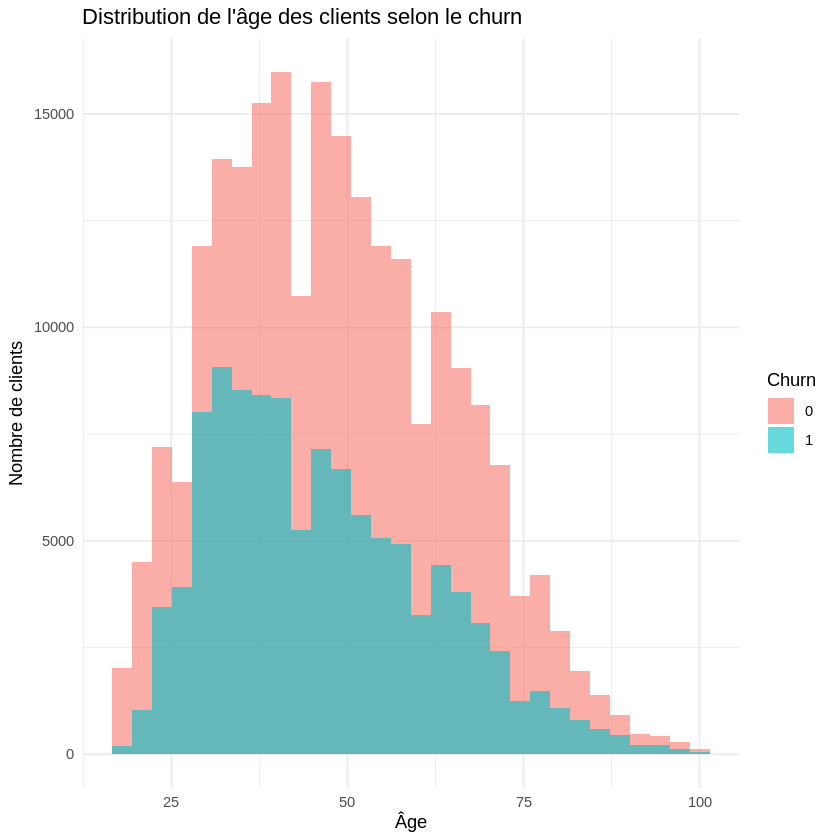

In [28]:
#Distribution de l’âge selon le churn (Histogramme)

# DISTRIBUTION DE L’ÂGE SELON LE CHURN

library(ggplot2)

ggplot(client_data, aes(x = age, fill = factor(churn))) +
  geom_histogram(bins = 30, position = "identity", alpha = 0.6, na.rm = TRUE) +
  labs(
    title = "Distribution de l'âge des clients selon le churn",
    x = "Âge",
    y = "Nombre de clients",
    fill = "Churn"
  ) +
  theme_minimal()


##Test statistique : comparaison de l’âge selon le churn


Afin de déterminer si la différence observée visuellement dans la distribution de l’âge entre les clients churnés et non churnés est statistiquement significative, un test de comparaison de moyennes est réalisé.

Avant cela, un test de normalité est appliqué pour vérifier les hypothèses nécessaires à l’utilisation d’un test paramétrique.

In [29]:
#est de normalité (Shapiro-Wilk)

# TEST DE NORMALITÉ DE L’ÂGE SELON LE CHURN

shapiro.test(sample(client_data$age[client_data$churn == 0], 5000))
shapiro.test(sample(client_data$age[client_data$churn == 1], 5000))



	Shapiro-Wilk normality test

data:  sample(client_data$age[client_data$churn == 0], 5000)
W = 0.98052, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(client_data$age[client_data$churn == 1], 5000)
W = 0.95829, p-value < 2.2e-16


##Test de comparaison de l’âge selon le churn


Étant donné que l’hypothèse de normalité n’est pas vérifiée pour la variable âge, un test non paramétrique de Wilcoxon (Mann–Whitney) est utilisé afin de comparer la distribution de l’âge entre les clients churnés et non churnés.

Ce test permet de déterminer si la différence observée entre les deux groupes est statistiquement significative.

In [30]:
# TEST DE WILCOXON : ÂGE SELON LE CHURN

wilcox.test(
  age ~ churn,
  data = client_data,
  exact = FALSE
)



	Wilcoxon rank sum test with continuity correction

data:  age by churn
W = 1.3311e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Il existe une différence statistiquement significative d’âge entre les clients churnés et non churnés. L’âge est donc une variable discriminante potentielle du churn, sans pour autant conclure à une relation causale.

##Comparaison de l’ancienneté selon le churn


Après l’analyse de l’âge, nous étudions l’ancienneté des clients (en années) afin d’évaluer si la durée de la relation bancaire est associée au churn.

Comme précédemment, une vérification de la normalité est effectuée avant de choisir le test statistique approprié.

In [31]:
# TEST DE NORMALITÉ DE L'ANCIENNETÉ SELON LE CHURN

shapiro.test(sample(client_data$seniority_years[client_data$churn == 0], 5000))
shapiro.test(sample(client_data$seniority_years[client_data$churn == 1], 5000))



	Shapiro-Wilk normality test

data:  sample(client_data$seniority_years[client_data$churn == 0], 5000)
W = 0.93426, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(client_data$seniority_years[client_data$churn == 1], 5000)
W = 0.9325, p-value < 2.2e-16


##Comparaison de l’ancienneté

Étant donné que l’hypothèse de normalité n’est pas vérifiée pour la variable ancienneté,
un test non paramétrique de Wilcoxon est utilisé afin de comparer l’ancienneté
entre les clients churnés et non churnés.



In [32]:
# TEST DE WILCOXON : ANCIENNETÉ SELON LE CHURN
wilcox.test(
  seniority_years ~ churn,
  data = client_data,
  exact = FALSE
)



	Wilcoxon rank sum test with continuity correction

data:  seniority_years by churn
W = 1.3937e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


La p-value étant largement inférieure au seuil de significativité de 5 %,
l’hypothèse nulle d’égalité des distributions est rejetée.
Il existe donc une différence statistiquement significative de l’ancienneté
entre les clients churnés et les clients non churnés.

##Analyse du solde moyen selon le churn

Cette section analyse la relation entre le solde moyen des clients et le churn.
Étant donné la forte asymétrie de la variable et la présence de valeurs négatives,
une approche non paramétrique est adoptée afin de comparer les distributions
entre clients churnés et non churnés.


In [33]:
# TEST DE WILCOXON : SOLDE MOYEN SELON LE CHURN
wilcox.test(
  balance_mean ~ churn,
  data = client_data,
  exact = FALSE
)



	Wilcoxon rank sum test with continuity correction

data:  balance_mean by churn
W = 3.018e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


La p-value étant largement inférieure au seuil de 5 %,
l’hypothèse nulle d’égalité des distributions est rejetée.
Il existe une différence statistiquement significative du solde moyen
entre les clients churnés et les clients non churnés.

##Synthèse de l’analyse univariée


Ces résultats mettent en évidence des variables associées au churn client et confirment leur intérêt dans le cadre d’une analyse statistique descriptive, sans recours à une modélisation prédictive.

In [34]:
# TABLEAU DE SYNTHÈSE DES TESTS UNIVARIÉS
tibble(
  Variable = c("Âge", "Ancienneté", "Solde moyen"),
  Test = c("Wilcoxon", "Wilcoxon", "Wilcoxon"),
  Resultat = c(
    "Différence significative",
    "Différence significative",
    "Différence significative"
  )
)


Variable,Test,Resultat
<chr>,<chr>,<chr>
Âge,Wilcoxon,Différence significative
Ancienneté,Wilcoxon,Différence significative
Solde moyen,Wilcoxon,Différence significative


##Analyse bivariée simple

Cette section vise à analyser les relations entre certaines variables quantitatives clés afin d’identifier des associations potentielles avec le churn client, sans chercher à établir un modèle prédictif.

In [35]:
# ANALYSE DE CORRÉLATION

client_data %>%
  select(age, seniority_years, balance_mean) %>%
  cor(use = "complete.obs", method = "spearman")


,age,seniority_years,balance_mean
age,1.0000000,0.40061647,0.15339445
seniority_years,0.4006165,1.00000000,0.09751573
balance_mean,0.1533945,0.09751573,1.00000000


## Conclusion

Cette étude statistique descriptive et comparative a permis d’analyser les différences de profils entre clients bancaires churnés et non churnés à partir de données sociodémographiques et financières, après une phase rigoureuse de préparation et de nettoyage des données.

Les résultats mettent en évidence des différences statistiquement significatives entre les deux groupes concernant l’âge, l’ancienneté et le solde moyen, confirmées par l’utilisation de tests non paramétriques adaptés à la non-normalité des données.

L’analyse montre que le churn client est un phénomène multifactoriel, qui ne peut être expliqué par une seule variable prise isolément.

Cette étude s’inscrit volontairement dans une démarche strictement descriptive et statistique, conformément au cadre fixé, et permet de mieux comprendre les caractéristiques associées au désengagement client dans le secteur bancaire.


##Perspectives

Des analyses futures pourraient intégrer des variables comportementales supplémentaires telles que la fréquence des transactions, l’évolution temporelle des soldes ou l’utilisation des services bancaires.

Une extension naturelle de ce travail consisterait à développer une approche prédictive du churn client à l’aide de modèles statistiques ou de machine learning, afin d’anticiper les risques de désengagement et d’améliorer les stratégies de rétention.